### **Arabic Handwritten Chars Classification Course Project**



### **Table of Content**



1.   Import Libraries
2.   Load the Dataset and Extract Labels
3.   Data Pre-Processing
4.   Build, Train and Evaluate Deep Neural Network Architecture
    1. Define Plot Function
    2. Define Deep Neural Networks
        *   First Deep Neural Network
        *   Second Deep Neural Network
        *   Third Deep Neural Network
        *   Fourth Deep Neural Network
        *   Fifth Deep Neural Network
        *   Sixth Deep Neural Network - Best Architecture
    











### 1.   Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
import re
import matplotlib.pylab as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.regularizers import l1,l2,l1_l2
import tensorflow as tf

###2.   Load the Dataset and Extract Labels


In [ ]:
!cp kaggle.json ~./kaggle
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/rashwan/arabic-chars-mnist")

cp: cannot stat 'kaggle.json': No such file or directory
Skipping, found downloaded files in "./arabic-chars-mnist" (use force=True to force download)


In [ ]:
# Set the test and train paths
test_path = '/content/arabic-chars-mnist/test'
train_path ='/content/arabic-chars-mnist/train'

In [ ]:
def dataset_labels(path):
  # Initialize empty list
  data = []
  # Loop into directory
  for filename in os.listdir(path):
    # Extract label
    img_label = re.sub('[0-9]+|\.jpg$', '', filename)
    # refine the image path
    img_path = os.path.join(path, filename)
    img = cv2.imread(img_path)
    # Add image path and image label to list
    data.append((img, img_label))
  # return the list
  return data

In [ ]:
train_dataset = dataset_labels(train_path)
test_dataset = dataset_labels(test_path)

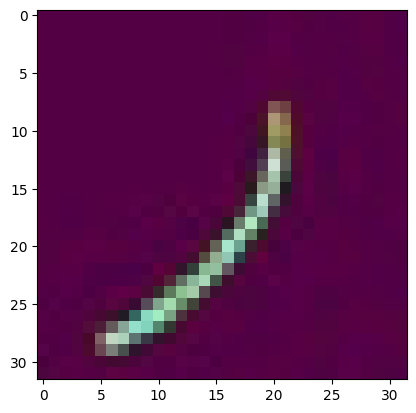

Image Label:  reh


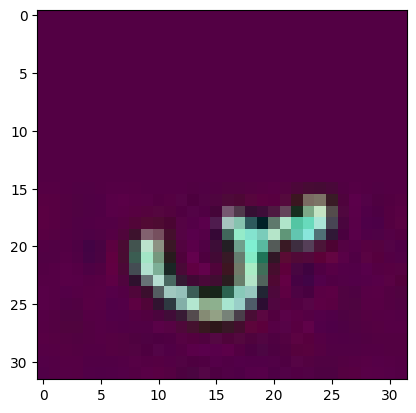

Image Label:  seen


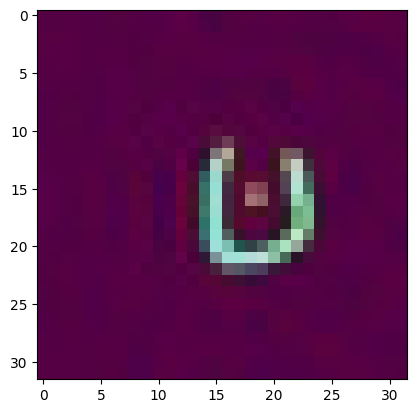

Image Label:  noon


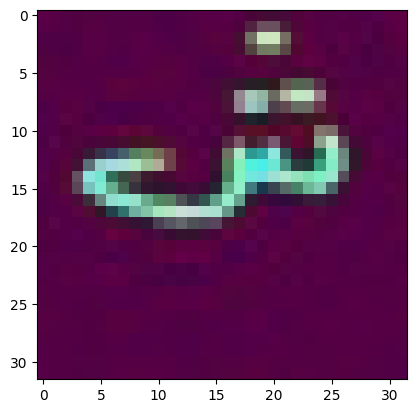

Image Label:  sheen


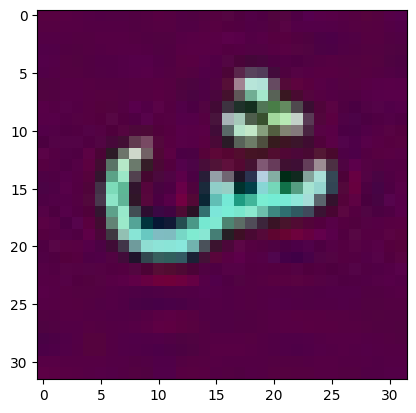

Image Label:  sheen


In [ ]:
i = 0
for img, label in train_dataset:
    i += 1
    plt.imshow(img)
    plt.show()
    print("Image Label: ", label)
    if (i == 5):
        break

### 3.   Data Pre-Processing


In [ ]:
train_label = [0] * len(train_dataset)
train_img = [0] * len(train_dataset)
count = 0

for data_images,  data_label in train_dataset:
   train_label[count] = data_label
   train_img[count] = data_images
   count +=1

test_label = [0] * len(test_dataset)
test_img = [0] * len(test_dataset)
count = 0

for data_images,  data_label in test_dataset:
   test_label[count] = data_label
   test_img[count] = data_images
   count +=1

In [ ]:
lb=LabelEncoder()

train_label = lb.fit_transform(train_label)
test_label = lb.fit_transform(test_label)

In [ ]:
train_shuffled, train_labels_shuffled = shuffle(train_img , train_label, random_state=42)
test_shuffled, test_labels_shuffled = shuffle(test_img, test_label, random_state=42)

In [ ]:
# Convert list to set to get unique elements
list(set(train_labels_shuffled))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27]

In [ ]:
train = np.array(train_shuffled)
train_labels = np.array(train_labels_shuffled)

test = np.array(test_shuffled)
test_labels = np.array(test_labels_shuffled)

In [ ]:
print("Train Data shape", train.shape)
print("Train Labels shape", train_labels.shape)
print("Test Data shape", test.shape)
print("Test Labels shape", test_labels.shape)

Train Data shape (13440, 32, 32, 3)
Train Labels shape (13440,)
Test Data shape (3360, 32, 32, 3)
Test Labels shape (3360,)


In [ ]:
# Normalize pixel values to 0,1
train, test = train / 255.0, test / 255.0

### 4.   Build, Train and Evaluate Deep Neural Network Architecture

#### 1. Define Plot Function

In [ ]:
def plot_history(history):

  fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))


  axes[0].plot(history['accuracy'], label='Train Accuracy')
  axes[0].plot(history['val_accuracy'], label='Validation Accuracy')
  axes[0].set_title('Training and Validation Accuracy')
  axes[0].set_xlabel('Epoch')
  axes[0].set_ylabel('Accuracy')
  axes[0].legend(loc='lower right')


  axes[1].plot(history['loss'], label='Train Loss')
  axes[1].plot(history['val_loss'], label='Validation Loss')
  axes[1].set_title('Training and Validation Loss')
  axes[1].set_xlabel('Epoch')
  axes[1].set_ylabel('Loss')
  axes[1].legend(loc='upper right')

  plt.tight_layout()
  plt.show()

#### 2. Define Deep Neural Networks


        *   First Deep Neural Network


In [ ]:
model_1=Sequential()

model_1=Sequential([
    Conv2D(16,(3,3),strides=1,activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32,(3,3),strides=1,activation='relu'),
    MaxPool2D(2,2),


    Conv2D(64,(3,3),strides=1,activation='relu'),
    Conv2D(128,(3,3),strides=1,activation='relu'),
    MaxPool2D(2,2),

    Flatten(),

    Dense(128,activation='relu'),
    Dense(28,activation='softmax'),
  ])

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                 

In [ ]:
model_1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
his_1 = model_1.fit(train, train_labels, epochs=10, validation_split=0.2, batch_size=128)

Epoch 1/10
84/84 [==============================] - 7s 25ms/step - loss: 2.2851 - accuracy: 0.3195 - val_loss: 1.3938 - val_accuracy: 0.5573
Epoch 2/10
84/84 [==============================] - 1s 17ms/step - loss: 1.0446 - accuracy: 0.6610 - val_loss: 0.9395 - val_accuracy: 0.6842
Epoch 3/10
84/84 [==============================] - 1s 13ms/step - loss: 0.6349 - accuracy: 0.7906 - val_loss: 0.6706 - val_accuracy: 0.7753
Epoch 4/10
84/84 [==============================] - 1s 14ms/step - loss: 0.4450 - accuracy: 0.8537 - val_loss: 0.5712 - val_accuracy: 0.8132
Epoch 5/10
84/84 [==============================] - 1s 14ms/step - loss: 0.3214 - accuracy: 0.8910 - val_loss: 0.4731 - val_accuracy: 0.8475
Epoch 6/10
84/84 [==============================] - 1s 12ms/step - loss: 0.2712 - accuracy: 0.9091 - val_loss: 0.4350 - val_accuracy: 0.8650
Epoch 7/10
84/84 [==============================] - 1s 11ms/step - loss: 0.2108 - accuracy: 0.9268 - val_loss: 0.3928 - val_accuracy: 0.8802
Epoch 8/10
84

In [ ]:
loss, acc = model_1.evaluate(test, test_labels)

105/105 [==============================] - 1s 8ms/step - loss: 0.4717 - accuracy: 0.8762


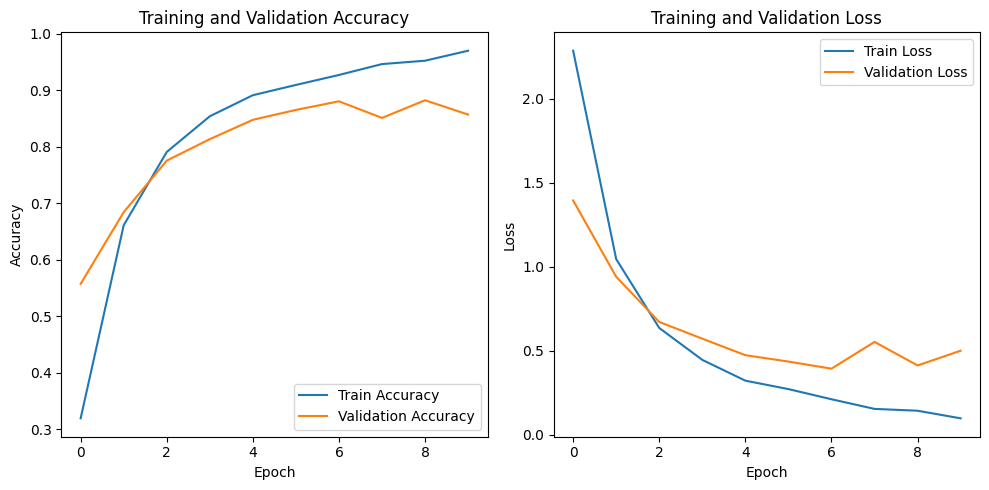

In [ ]:
plot_history(his_1.history)

        *   Second Deep Neural Network

In [ ]:
model_2=Sequential()

model_2=Sequential([
    Conv2D(16,(3,3),strides=1,activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32,(3,3),strides=1,activation='relu'),
    MaxPool2D(2,2),


    Conv2D(64,(3,3),strides=1,activation='relu'),
    Conv2D(128,(3,3),strides=1,activation='relu'),
    MaxPool2D(2,2),

    Flatten(),

    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(28,activation='softmax'),
  ])
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                 

In [ ]:
model_2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
his_2 = model_2.fit(train, train_labels, epochs=10, validation_split=0.2, batch_size=128)

Epoch 1/10
84/84 [==============================] - 4s 13ms/step - loss: 2.7525 - accuracy: 0.1942 - val_loss: 1.6036 - val_accuracy: 0.5175
Epoch 2/10
84/84 [==============================] - 1s 8ms/step - loss: 1.5733 - accuracy: 0.4860 - val_loss: 0.8623 - val_accuracy: 0.7522
Epoch 3/10
84/84 [==============================] - 1s 8ms/step - loss: 1.0712 - accuracy: 0.6376 - val_loss: 0.5987 - val_accuracy: 0.8199
Epoch 4/10
84/84 [==============================] - 1s 8ms/step - loss: 0.8172 - accuracy: 0.7272 - val_loss: 0.4908 - val_accuracy: 0.8449
Epoch 5/10
84/84 [==============================] - 1s 8ms/step - loss: 0.6489 - accuracy: 0.7797 - val_loss: 0.3833 - val_accuracy: 0.8843
Epoch 6/10
84/84 [==============================] - 1s 8ms/step - loss: 0.5647 - accuracy: 0.8112 - val_loss: 0.3399 - val_accuracy: 0.8906
Epoch 7/10
84/84 [==============================] - 1s 9ms/step - loss: 0.4871 - accuracy: 0.8370 - val_loss: 0.3377 - val_accuracy: 0.8925
Epoch 8/10
84/84 [=

In [ ]:
loss, acc = model_2.evaluate(test, test_labels)

105/105 [==============================] - 1s 4ms/step - loss: 0.2400 - accuracy: 0.9277


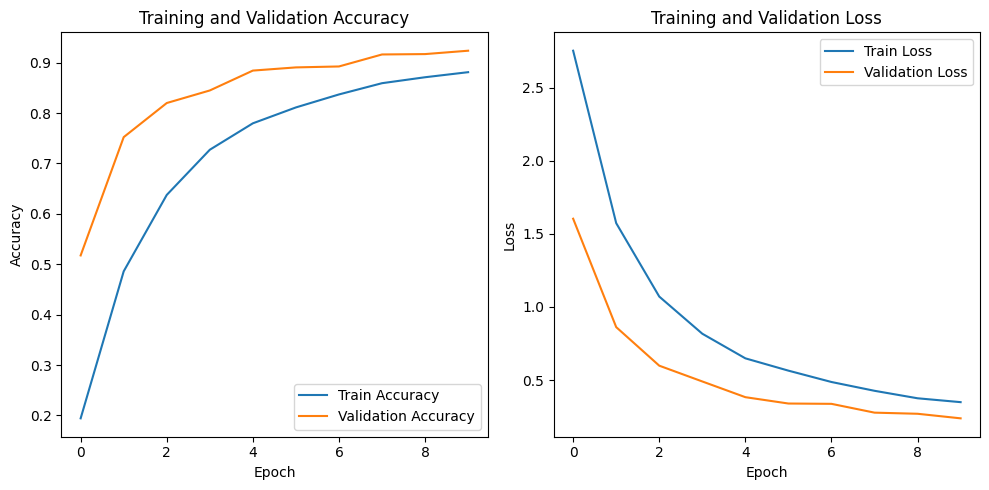

In [ ]:
plot_history(his_2.history)

        *   Third Deep Neural Network

In [ ]:
model_3=Sequential()

model_3=Sequential([
    Conv2D(16,(3,3),strides=1,activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32,(3,3),strides=1,activation='relu'),
    MaxPool2D(2,2),
    BatchNormalization(),

    Conv2D(64,(3,3),strides=1,activation='relu'),
    Conv2D(128,(3,3),strides=1,activation='relu'),
    MaxPool2D(2,2),
    BatchNormalization(),

    Flatten(),

    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(28,activation='softmax'),
  ])
model_3.summary()

model_3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 128)      

In [ ]:
his_3 = model_3.fit(train, train_labels, epochs=15, validation_split=0.2, batch_size=64)

Epoch 1/15
168/168 [==============================] - 4s 7ms/step - loss: 2.1658 - accuracy: 0.3685 - val_loss: 6.6703 - val_accuracy: 0.0368
Epoch 2/15
168/168 [==============================] - 1s 6ms/step - loss: 0.9439 - accuracy: 0.6924 - val_loss: 7.5523 - val_accuracy: 0.0406
Epoch 3/15
168/168 [==============================] - 1s 6ms/step - loss: 0.5510 - accuracy: 0.8169 - val_loss: 1.5167 - val_accuracy: 0.5372
Epoch 4/15
168/168 [==============================] - 1s 6ms/step - loss: 0.3822 - accuracy: 0.8760 - val_loss: 0.4889 - val_accuracy: 0.8519
Epoch 5/15
168/168 [==============================] - 1s 6ms/step - loss: 0.2876 - accuracy: 0.9076 - val_loss: 0.6707 - val_accuracy: 0.7772
Epoch 6/15
168/168 [==============================] - 1s 6ms/step - loss: 0.2402 - accuracy: 0.9185 - val_loss: 1.8197 - val_accuracy: 0.6045
Epoch 7/15
168/168 [==============================] - 1s 7ms/step - loss: 0.1908 - accuracy: 0.9382 - val_loss: 1.6355 - val_accuracy: 0.5997
Epoch 

In [ ]:
loss, acc = model_3.evaluate(test, test_labels)

105/105 [==============================] - 1s 4ms/step - loss: 1.0636 - accuracy: 0.7851


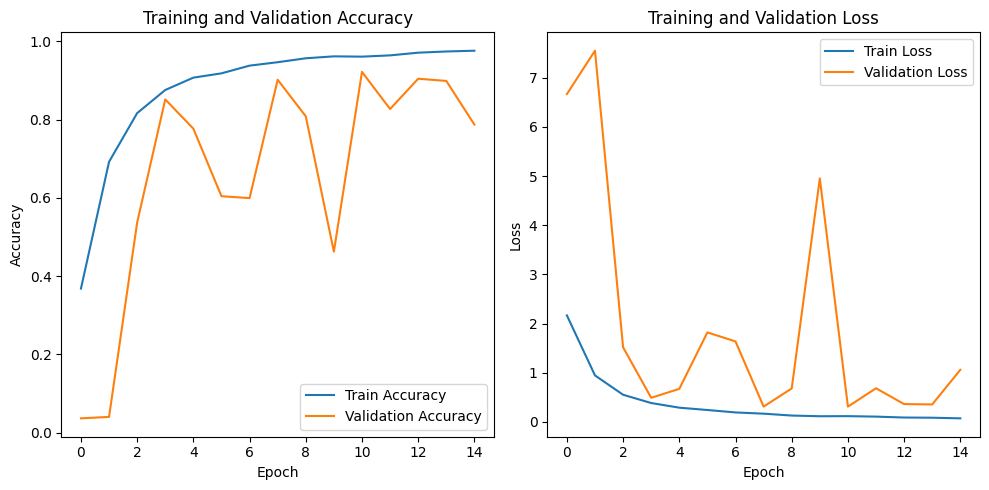

In [ ]:
plot_history(his_3.history)

        *   Fourth Deep Neural Network

In [ ]:
model_4=Sequential()

model_4=Sequential([
    Conv2D(16,(3,3),strides=1,activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32,(3,3),strides=1,activation='relu'),
    MaxPool2D(2,2),
    BatchNormalization(),

    Conv2D(64,(3,3),strides=1,activation='relu'),
    Conv2D(128,(3,3),strides=1,activation='relu'),
    MaxPool2D(2,2),
    BatchNormalization(),

    Flatten(),

    Dense(128,activation='relu',kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    Dropout(0.5),
    Dense(28,activation='softmax'),
  ])
model_4.summary()

model_4.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 14, 14, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 128)      

In [ ]:
his_4 = model_4.fit(train, train_labels, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
168/168 [==============================] - 4s 8ms/step - loss: 7.4937 - accuracy: 0.3770 - val_loss: 8.4053 - val_accuracy: 0.0368
Epoch 2/10
168/168 [==============================] - 1s 6ms/step - loss: 2.7527 - accuracy: 0.7324 - val_loss: 5.2395 - val_accuracy: 0.0778
Epoch 3/10
168/168 [==============================] - 1s 6ms/step - loss: 1.7632 - accuracy: 0.8454 - val_loss: 2.2289 - val_accuracy: 0.7355
Epoch 4/10
168/168 [==============================] - 1s 6ms/step - loss: 1.4583 - accuracy: 0.8835 - val_loss: 1.4360 - val_accuracy: 0.8858
Epoch 5/10
168/168 [==============================] - 1s 6ms/step - loss: 1.2813 - accuracy: 0.9089 - val_loss: 1.4172 - val_accuracy: 0.8564
Epoch 6/10
168/168 [==============================] - 1s 7ms/step - loss: 1.1870 - accuracy: 0.9207 - val_loss: 1.6676 - val_accuracy: 0.7731
Epoch 7/10
168/168 [==============================] - 1s 8ms/step - loss: 1.1283 - accuracy: 0.9310 - val_loss: 1.2176 - val_accuracy: 0.9107
Epoch 

In [ ]:
loss, acc = model_4.evaluate(test, test_labels)

105/105 [==============================] - 1s 3ms/step - loss: 1.4002 - accuracy: 0.8366


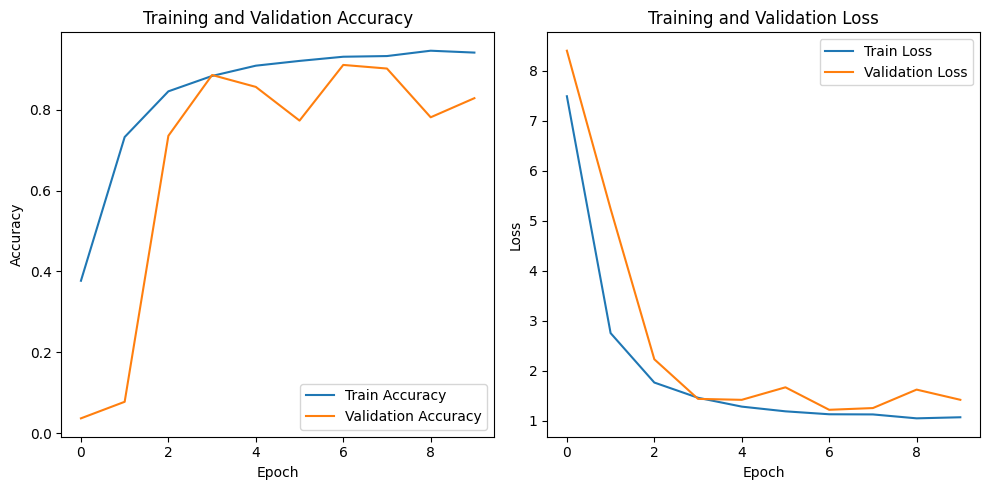

In [ ]:
plot_history(his_4.history)

        *   Fifth Deep Neural Network


In [ ]:
model_5=Sequential()

model_5=Sequential([
    Conv2D(16,(3,3),strides=1,activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32,(3,3),strides=1,activation='relu'),
    MaxPool2D(2,2),
    BatchNormalization(),

    Conv2D(64,(3,3),strides=1,activation='relu'),
    Conv2D(128,(3,3),strides=1,activation='relu'),
    MaxPool2D(2,2),
    BatchNormalization(),

    Flatten(),

    Dense(128,activation='relu',kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    Dropout(0.5),
    Dense(28,activation='softmax'),
  ])
model_5.summary()

model_5.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Bat  (None, 14, 14, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 10, 128)      

In [ ]:
his_5 = model_5.fit(train, train_labels, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
168/168 [==============================] - 4s 8ms/step - loss: 3.1350 - accuracy: 0.3388 - val_loss: 6.8394 - val_accuracy: 0.0420
Epoch 2/10
168/168 [==============================] - 1s 6ms/step - loss: 1.7681 - accuracy: 0.6822 - val_loss: 5.7038 - val_accuracy: 0.1332
Epoch 3/10
168/168 [==============================] - 1s 6ms/step - loss: 1.2509 - accuracy: 0.8234 - val_loss: 2.1081 - val_accuracy: 0.5629
Epoch 4/10
168/168 [==============================] - 1s 6ms/step - loss: 1.0011 - accuracy: 0.8816 - val_loss: 1.0157 - val_accuracy: 0.8698
Epoch 5/10
168/168 [==============================] - 1s 6ms/step - loss: 0.8431 - accuracy: 0.9154 - val_loss: 0.9026 - val_accuracy: 0.8876
Epoch 6/10
168/168 [==============================] - 1s 8ms/step - loss: 0.7225 - accuracy: 0.9328 - val_loss: 0.8594 - val_accuracy: 0.8824
Epoch 7/10
168/168 [==============================] - 1s 8ms/step - loss: 0.6479 - accuracy: 0.9483 - val_loss: 0.7854 - val_accuracy: 0.8921
Epoch 

In [ ]:
loss, acc = model_5.evaluate(test, test_labels)

105/105 [==============================] - 0s 3ms/step - loss: 0.6445 - accuracy: 0.9176


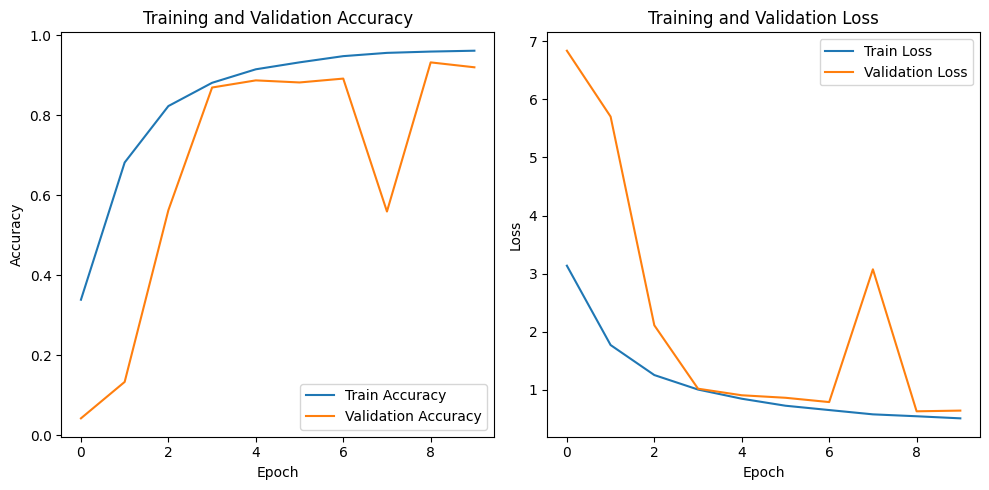

In [ ]:
plot_history(his_5.history)

        *   Sixth Deep Neural Network


In [ ]:
model_6=Sequential()

model_6=Sequential([
    Conv2D(16,(3,3),strides=1,activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32,(3,3),strides=1,activation='relu'),
    MaxPool2D(2,2),
    BatchNormalization(),

    Conv2D(64,(3,3),strides=1,activation='relu'),
    Conv2D(128,(3,3),strides=1,activation='relu'),
    MaxPool2D(2,2),
    BatchNormalization(),

    Flatten(),

    Dense(128,activation='relu',kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    Dropout(0.5),
    Dense(28,activation='softmax'),
  ])
model_6.summary()

model_6.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_6 (Bat  (None, 14, 14, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 10, 10, 128)     

In [ ]:
his_6 = model_6.fit(train, train_labels, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
336/336 [==============================] - 5s 7ms/step - loss: 2.9316 - accuracy: 0.3899 - val_loss: 7.3247 - val_accuracy: 0.0368
Epoch 2/10
336/336 [==============================] - 2s 6ms/step - loss: 1.5677 - accuracy: 0.7397 - val_loss: 2.0505 - val_accuracy: 0.5945
Epoch 3/10
336/336 [==============================] - 2s 7ms/step - loss: 1.1559 - accuracy: 0.8453 - val_loss: 1.5237 - val_accuracy: 0.7165
Epoch 4/10
336/336 [==============================] - 2s 7ms/step - loss: 0.9503 - accuracy: 0.8922 - val_loss: 1.0590 - val_accuracy: 0.8423
Epoch 5/10
336/336 [==============================] - 2s 6ms/step - loss: 0.8267 - accuracy: 0.9115 - val_loss: 1.1662 - val_accuracy: 0.8006
Epoch 6/10
336/336 [==============================] - 2s 6ms/step - loss: 0.7222 - accuracy: 0.9327 - val_loss: 0.8289 - val_accuracy: 0.8943
Epoch 7/10
336/336 [==============================] - 2s 6ms/step - loss: 0.6880 - accuracy: 0.9348 - val_loss: 1.0195 - val_accuracy: 0.8348
Epoch 

In [ ]:
loss, acc = model_6.evaluate(test, test_labels)

105/105 [==============================] - 0s 3ms/step - loss: 0.6352 - accuracy: 0.9482


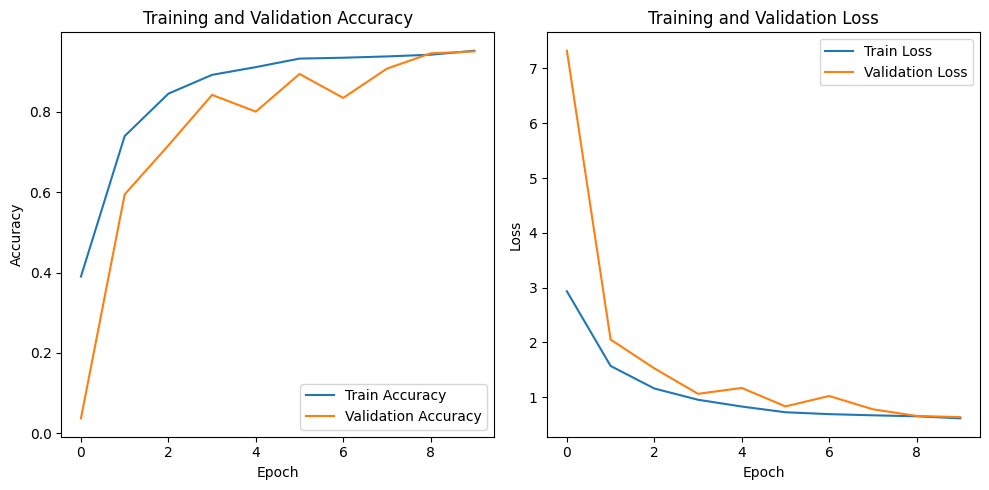

In [ ]:
plot_history(his_6.history)

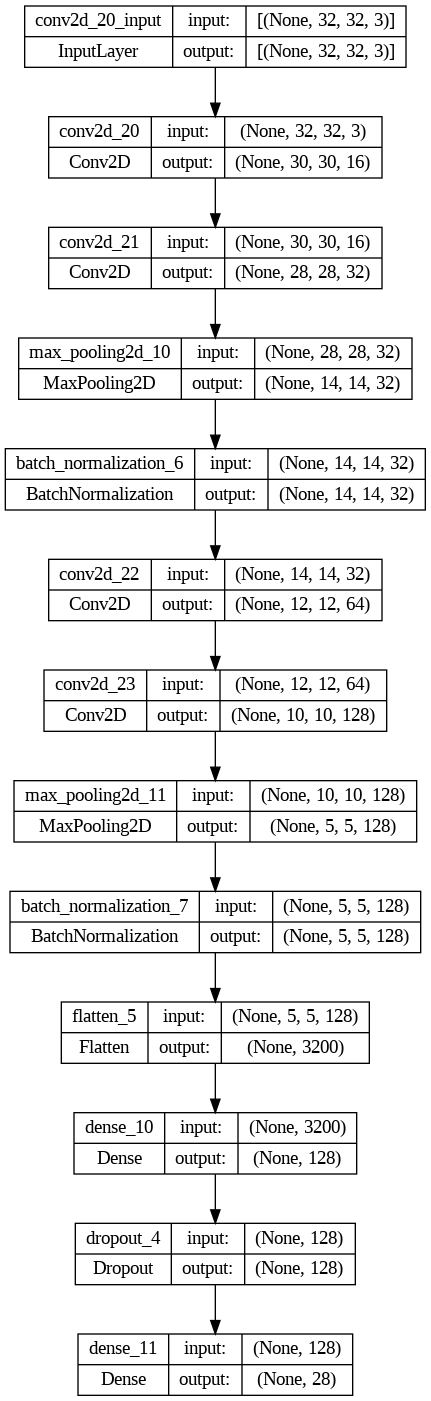

In [ ]:
plot_model(model_6, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_6.save('Deep_Learning')

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

predictions = model_6.predict(test)
predicted_classes = np.argmax(predictions, axis=1)

report = classification_report(test_labels, predicted_classes)

print(report)

105/105 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       120
           1       0.98      0.99      0.99       120
           2       0.98      0.98      0.98       120
           3       0.99      0.93      0.96       120
           4       0.88      0.97      0.92       120
           5       0.95      0.92      0.93       120
           6       0.94      0.97      0.96       120
           7       0.90      0.97      0.93       120
           8       0.96      0.93      0.95       120
           9       0.98      0.97      0.97       120
          10       0.97      0.95      0.96       120
          11       0.95      0.94      0.95       120
          12       0.95      1.00      0.98       120
          13       0.99      0.97      0.98       120
          14       0.97      0.91      0.94       120
          15       0.90      0.96      0.93       120
          16       0.95   